# Cities ranked by  
**Movehub Rating:** A combination of all scores for an overall rating for a city or country.  
**Purchase Power:** This compares the average cost of living with the average local wage.  
**Health Care:** Compiled from how citizens feel about their access to healthcare, and its quality.  
**Pollution:** Low is good. A score of how polluted people find a city, includes air, water and noise pollution.  
**Quality of Life:** A balance of healthcare, pollution, purchase power, crime rate to give an overall quality of life score.  
**Crime Rating:** Low is good. The lower the score the safer people feel in this city.  

In [32]:
import numpy as np 
import pandas as pd
import csv
from IPython.display import display # Allows the use of display() for DataFrames
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy as scipy
from scipy.stats.stats import pearsonr
# Pretty display for notebooks
%matplotlib inline

In [33]:
# Load the datasets
df_cost = pd.read_csv('https://raw.githubusercontent.com/miuko/IBMproject/master/citiescostofliving.csv')
df_quality = pd.read_csv('https://raw.githubusercontent.com/miuko/IBMproject/master/citiesqualityoflife.csv')
df_city = pd.read_csv('https://raw.githubusercontent.com/miuko/IBMproject/master/cities.csv')

# Print the first few entries of the data
df_cost.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [34]:
df_quality.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [35]:
df_city.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [36]:
#Insertion of the countries that are missing
df_city.iloc[654,1]='Ukraine'
df_city.iloc[724,1]='Russia'
df_city.iloc[1529,1]='Kosovo'

In [37]:
#Merge Datasets
df_raiting = pd.merge(df_cost, df_quality, how='outer')
#Sort Dataset by 'City'
df_raiting = df_raiting.sort_values(by='City')
#Modification of the values of the index
df_raiting.reset_index(drop=True)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
5,Ahmedabad,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18
6,Alicante,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01
7,Amman,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74
8,Amsterdam,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76
9,Antalya,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53


In [38]:
#Insert column country to dataset.
df_rating= pd.merge(df_raiting, df_city,how='left',on='City')
df_rating.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia


In [39]:
#Update wrong names of the cities
df_rating.iloc[227,0]='Zürich'
df_rating.iloc[224,0]='Washington, D.C.'
df_rating.iloc[201,0]='Tampa, Florida'
df_rating.iloc[188,0]='São Paulo'
df_rating.iloc[185,0]='San Francisco, California'
df_rating.iloc[184,0]='San Diego, California'
df_rating.iloc[193,13]='Malta'
df_rating.iloc[10,13]='United States' 
df_rating.iloc[51,13]='Philippines'
df_rating.iloc[61,13]='Argentina' 
df_rating.iloc[66,0]='Davao City'
df_rating.iloc[74,0]='Düsseldorf'
df_rating.iloc[79,0]='Frankfurt am Main'
df_rating.iloc[81,13]='Ireland' 
df_rating.iloc[100,0]='İstanbul'
df_rating.iloc[101,0]='İzmir'
df_rating.iloc[122,13]='Poland' 
df_rating.iloc[129,0]='Málaga'
df_rating.iloc[130,0]='Malmö'
df_rating.iloc[134,13]='Spain'
df_rating.iloc[136,0]='Medellín'
df_rating.iloc[139,0]='Miami, Florida'
df_rating.iloc[141,0]='Minneapolis, Minnesota'
df_rating.iloc[164,13]='Thailand'
df_rating.iloc[166,0]='Philadelphia, Pennsylvania'
df_rating.iloc[167,0]='Phoenix, Arizona'
df_rating.iloc[168,0]='Portland, Oregon'
df_rating.iloc[176,0]='Rio de Janeiro'
df_rating.iloc[178,13]='United States'
df_rating.iloc[183,0]='San Antonio, Texas'

In [40]:
#See there isn't any NAN countries
df_rating[df_rating['Country'].isnull()]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country
66,Davao City,0.79,1.90,3.17,0.84,554.18,158.34,69.29,17.63,69.00,77.98,30.66,17.71,NaN
74,Düsseldorf,2.13,8.31,4.47,1.28,1193.48,2301.70,83.45,72.52,75.98,8.61,88.02,15.34,NaN
79,Frankfurt am Main,2.13,7.67,4.07,1.36,1022.98,1875.46,82.75,62.60,65.33,14.54,88.04,27.55,NaN
100,İstanbul,1.99,5.44,9.06,1.66,634.23,724.84,80.22,34.42,80.38,44.98,45.67,42.36,NaN
101,İzmir,1.81,4.71,7.25,1.69,543.63,590.57,76.07,32.12,57.33,30.55,42.90,25.91,NaN
129,Málaga,1.28,7.03,2.98,1.21,575.43,968.42,84.30,45.77,69.17,30.55,67.90,9.11,NaN
130,Malmö,2.90,10.01,8.51,1.40,1101.38,1802.26,81.37,52.56,87.96,83.45,60.32,33.97,NaN
136,Medellín,1.31,3.38,7.48,0.78,261.51,310.54,70.14,19.20,85.88,37.27,39.70,46.02,NaN
139,"Miami, Florida",2.62,6.54,9.81,0.65,1961.31,2052.83,84.43,57.79,64.44,22.45,74.77,64.85,NaN
141,"Minneapolis, Minnesota",2.62,6.54,9.81,0.64,980.65,2295.38,83.47,69.91,62.35,77.94,83.79,40.36,NaN


In [41]:
#Do merge again to recover the names of the countries with the names of the cities already updated.
df_r = pd.merge(df_rating, df_city,how='inner',on='City')
#Delete column 'Country_x' and alter the name of 'Country_y'
df_r = df_r.drop('Country_x',axis=1)
df_r = df_r.rename(columns={'Country_y': 'Country'})
#See there isn't any NAN countries
df_r[df_r['Country'].isnull()]

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Country


In [42]:
#Delete all the duplicated registers for all the cities:
df_r=df_r.drop_duplicates(subset=['City','Country'])

In [13]:
df_r.shape

(219, 14)

In [43]:
#Replace '' by '_' in header
df_r.columns = df_r.columns.str.replace(' ','_')

In [15]:
df_r

,City,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Country
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,Germany
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,United Kingdom
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,United Arab Emirates
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,Ethiopia
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,Australia
5,Ahmedabad,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18,India
6,Alicante,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01,Spain
7,Amman,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74,Jordan
8,Amsterdam,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76,Netherlands
9,Antalya,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53,Turkey


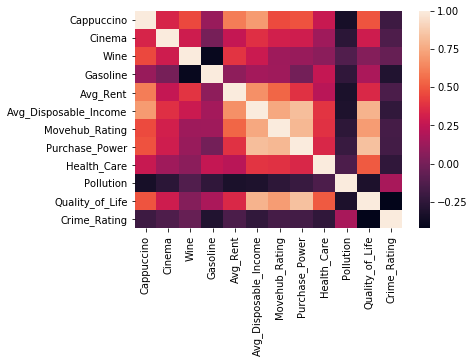

In [44]:
#Seaborn's heatmap correlation matrix
import seaborn as sns
corr = df_r.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

>Products With High Correlation to Movehub_Rating:  
Purchase_Power, Income, Quality of Life  
  
>Products With Low Correlation to Movehub_Rating:   
Pollution, Crime_Rating  

In [48]:
x = df_r.drop(['Movehub_Rating','Country','City'], axis = 1) 
y = df_r['Movehub_Rating']

#Basic Information of Statistics
minimum_movehubrating = np.min(y)
maximum_movehubrating = np.max(y)
mean_movehubrating = np.mean(y)
std_movehubrating = np.std(y)

print ("Minimum movehub rating: ",minimum_movehubrating)
print ("Maximum movehub rating: ",maximum_movehubrating)
print ("Avg movehub rating:     ",mean_movehubrating)
print ("Std de movehub rating:  ",std_movehubrating)

Minimum movehub rating:  59.88
Maximum movehub rating:  100.0
Avg movehub rating:      79.89611872146122
Std de movehub rating:   6.493793735698387


In [50]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline 

<h2 id="pre_processing">Pre-processing</h2

City and Country in this dataset are the categorical variables. So, lets drop these features and run clustering.

In [61]:
df_r.drop(["City", "Country"], axis = 1, inplace = True) 
df_r 

,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
0,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
5,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18
6,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01
7,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74
8,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76
9,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53


<h2 id="Normalizing">Normalizing over the standard deviation</h2

In [63]:
df_r = df_r.reset_index()
df_r

,index,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
0,0,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,1,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,2,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,3,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,4,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
5,5,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18
6,6,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01
7,7,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74
8,8,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76
9,9,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53


Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [64]:
from sklearn.preprocessing import StandardScaler
X = df_r.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.08548931,  0.00819861, -0.86517735, ..., -1.33593718,
         1.39617016, -1.60322048],
       [ 0.00449944,  0.02608203, -0.34367025, ..., -0.45087717,
         0.76992285, -1.05415957],
       [ 0.92238465, -0.10804362,  2.00614375, ...,  0.29684595,
         0.95347024, -1.88022419],
       ..., 
       [ 0.28796399,  0.35513695,  0.35066189, ..., -0.5979959 ,
         0.90929134, -0.85877303],
       [-1.1698537 , -0.56049413, -0.79847296, ...,  1.47183942,
        -0.55908781, -0.55518192],
       [ 1.74578167,  1.02934187,  0.39007812, ..., -1.08747869,
         1.73274963, -1.60260217]])

<h2 id="Modelling">Modelling</h2

Lets apply k-means on our dataset, and take look at cluster labels.

In [77]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 1 2 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 2 1 0 1 1 2 0 0 0 1 2 1 1 0 2 0
 0 1 1 1 1 0 0 0 0 2 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 2 1 1 0 1 2 0 2 0 0 0 0
 0 1 0 1 2 0 0 0 1 1 0 0 0 1 0 2 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2
 0 0 1 1 1 0 1 2 2 0 2 0 0 1 0 0 0 1 0 1 2 1 0 0 0 1 1 0 0 1 0 0 1 1 2 0 2
 0 0 1 1 0 0 2 0 0 2 2 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 2 1 1 1 0 0 1 2
 1 2 0 0 0 2 1 0 1 0 1 1 0 0 0 2 1 0 1 1 1 1 0 0 1 0 0 0 1 1 2 0 1 2]


<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.

In [78]:
df_r["Cluster"] = labels
df_r.head(35)

,index,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Cluster
0,0,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,0
1,1,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,0
2,2,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,0
3,3,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,1
4,4,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,2
5,5,0.72,2.11,4.22,0.85,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18,1
6,6,1.28,6.01,4.03,1.19,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01,1
7,7,2.55,6.54,12.79,0.83,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74,1
8,8,2.09,8.52,4.26,1.45,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76,0
9,9,1.81,3.26,5.44,1.62,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53,1


Check the centroid values by averaging the features in each cluster.

In [79]:
df_r.groupby('Cluster').mean()

,index,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
Cluster,,,,,,,,,,,,,
0,126.708333,2.254479,8.307500,7.187500,1.041979,1219.606146,1895.056875,82.976563,60.218750,70.936667,39.705729,74.500938,38.907708
1,119.442105,1.449474,4.395684,6.164526,0.962000,631.995158,548.929053,74.623368,28.530737,60.278947,55.937053,40.687684,45.598947
2,132.571429,2.891071,10.056071,10.079286,1.078571,2317.171429,2808.020000,87.224286,60.792500,72.532143,32.561786,74.753929,34.673929


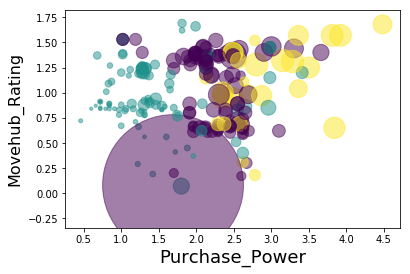

In [91]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Purchase_Power', fontsize=18)
plt.ylabel('Movehub_Rating', fontsize=16)

plt.show()
#plt.colorbar()

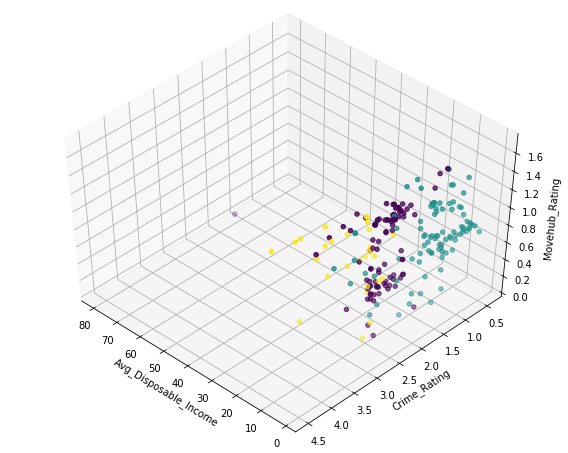

In [103]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Avg_Disposable_Income')
ax.set_ylabel('Crime_Rating')
ax.set_zlabel('Movehub_Rating')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

In [84]:
df_r.loc[df_r['Cluster'] == 0, df_r.columns[[1] + list(range(5, df_r.shape[1]))]]

,Cappuccino,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Cluster
0,2.05,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,0
1,1.99,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22,0
2,2.67,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86,0
8,2.09,1513.16,1747.59,84.00,47.18,68.06,53.42,72.85,29.76,0
12,2.21,1046.03,2288.19,84.92,80.83,61.11,63.09,80.51,56.04,0
13,2.20,1432.98,2149.47,86.43,49.02,71.85,30.03,66.98,50.38,0
14,2.29,1372.91,2105.14,84.86,69.22,73.61,28.84,86.51,42.50,0
16,2.12,1372.91,2284.92,84.28,78.78,72.08,77.98,82.00,58.85,0
23,2.19,807.12,1494.67,82.15,52.80,33.33,29.24,80.55,34.06,0
27,1.88,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,0


In [86]:
df_r.loc[df_r['Cluster'] == 1, df_r.columns[[1] + list(range(5, df_r.shape[1]))]]

,Cappuccino,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Cluster
3,0.46,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04,1
5,0.72,193.08,301.69,76.16,33.69,61.67,68.21,57.01,18.18,1
6,1.28,511.49,852.48,82.83,44.69,75.61,28.19,72.53,44.01,1
7,2.55,460.92,441.94,74.40,21.22,75.37,61.63,39.57,46.74,1
9,1.81,217.45,362.42,71.91,22.91,59.55,30.55,40.51,44.53,1
10,2.98,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49,1
11,2.98,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49,1
15,2.53,1278.72,340.99,66.42,11.38,28.70,49.47,17.20,36.69,1
17,0.72,362.03,422.37,77.92,38.67,69.38,80.94,52.11,51.03,1
18,1.37,1139.76,455.91,74.21,20.82,95.96,60.39,37.54,36.10,1


In [88]:
df_r.loc[df_r['Cluster'] == 2, df_r.columns[[1] + list(range(5, df_r.shape[1]))]]

,Cappuccino,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Cluster
4,2.49,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,2
21,3.50,1649.29,3847.76,84.20,78.17,79.74,59.18,88.27,28.12,2
26,3.92,1725.37,3002.59,80.74,51.24,84.95,18.40,83.76,16.67,2
31,2.62,2288.19,2451.63,82.20,59.28,78.04,61.77,82.81,40.69,2
35,2.69,2351.93,2603.92,87.63,53.72,88.89,22.19,77.07,45.84,2
46,2.35,1984.74,3023.91,83.23,63.26,91.90,11.48,93.05,40.36,2
62,3.36,2015.94,2435.93,79.63,49.51,75.28,6.78,78.52,32.80,2
67,2.78,2221.74,2775.58,90.73,81.96,68.06,83.45,80.28,27.17,2
69,2.62,1981.57,2313.91,98.44,69.64,67.78,30.81,85.16,19.36,2
78,2.80,2607.95,3917.72,83.27,61.22,74.88,29.43,82.76,54.36,2
